In [71]:
low_budget.describe().iloc[:,-3:]

,domestic_success,foreign_success,WW_success
count,1104.000000,76.000000,1104.000000
mean,9.171927,7.435801,13.057042
std,59.100067,24.142682,66.335127
min,0.000000,0.004550,0.000026
25%,0.075408,0.289624,0.212978
50%,0.941282,1.833333,1.686642
75%,4.895456,4.452778,7.058571
max,1800.000000,202.000000,1800.000000


In [72]:
mid_budget.describe().iloc[:,-3:]

,domestic_success,foreign_success,WW_success
count,2975.000000,592.000000,2975.000000
mean,1.743540,1.748970,3.072227
std,2.633854,2.738256,4.748629
min,0.000000,0.000030,0.000125
25%,0.318128,0.357024,0.625621
50%,0.997365,0.927857,1.722419
75%,2.157811,2.068750,3.609725
max,41.908910,30.578947,75.520507


In [73]:
high_budget.describe().iloc[:,-3:]

,domestic_success,foreign_success,WW_success
count,1073.000000,341.000000,1073.000000
mean,1.162799,2.023427,2.817022
std,0.890666,1.569798,2.224842
min,0.000000,0.000004,0.007943
25%,0.556753,0.986667,1.295164
50%,0.934403,1.672727,2.284781
75%,1.512535,2.697143,3.667582
max,6.303232,12.494545,16.489089


Text(0, 0.5, 'Worldwide Success')

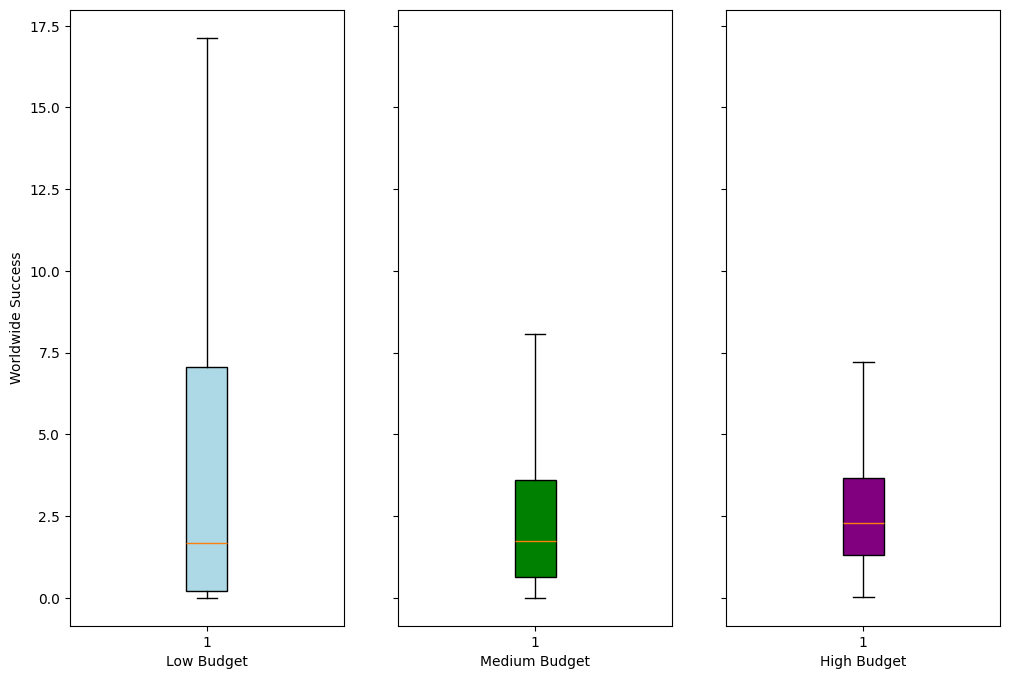

In [74]:
fig, ax = plt.subplots(1,3, figsize = (12,8), sharey = True)

bplot1 = ax[0].boxplot(low_budget['WW_success'], showfliers=False, patch_artist = True,
           boxprops = dict(facecolor = "lightblue"))
ax[0].set_xlabel('Low Budget')

bplot2 = ax[1].boxplot(mid_budget['WW_success'],showfliers=False, patch_artist = True,
           boxprops = dict(facecolor = "green"))
ax[1].set_xlabel('Medium Budget')

bplot3 = ax[2].boxplot(high_budget['WW_success'],showfliers=False, patch_artist = True,
           boxprops = dict(facecolor = "purple"))
ax[2].set_xlabel('High Budget')

ax[0].set_ylabel('Worldwide Success')



Text(0.5, 0, 'Runtime (minutes)')

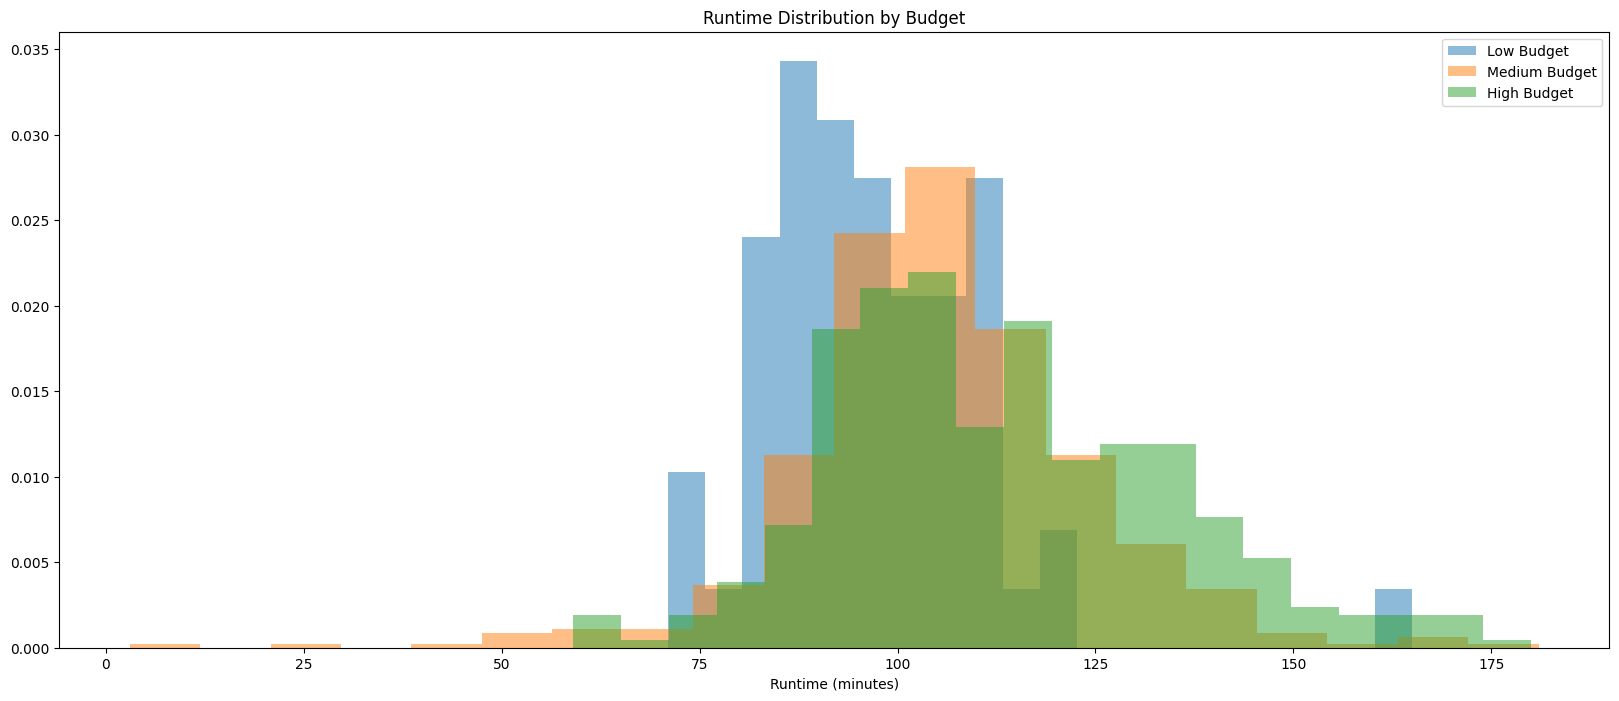

In [75]:
fig, ax = plt.subplots(figsize = (20,8))

ax.hist(low_budget_ratings_moneymaker['runtime_minutes'], alpha = 0.5, bins = 20, density = True, label = 'Low Budget')


ax.hist(mid_budget_ratings_moneymaker['runtime_minutes'], alpha = 0.5, bins = 20, density = True, label = 'Medium Budget')
ax.hist(high_budget_ratings_moneymaker['runtime_minutes'], alpha = 0.5, bins = 20, density = True, label = 'High Budget')
ax.legend(loc='upper right')
ax.set_title('Runtime Distribution by Budget')
ax.set_xlabel('Runtime (minutes)')


In [76]:
x_bar = np.mean(low_budget_ratings_moneymaker['runtime_minutes'])
s = np.std(low_budget_ratings_moneymaker['runtime_minutes'], ddof = 1)
se = s/np.sqrt(len(low_budget_ratings_moneymaker['runtime_minutes']))
print('Low Budget Sample mean:', x_bar)
print('Low Budget Sample standard deviation:', s)
print('Low Budget Estimated standard error:', se)
stats.t.interval(confidence = 0.95,                              
                 df= len(low_budget_ratings_moneymaker['runtime_minutes'])-1,             
                 loc = x_bar,                               
                 scale = se)    

Low Budget Sample mean: 96.74193548387096
Low Budget Sample standard deviation: 14.54437583135276
Low Budget Estimated standard error: 1.8324191154484621


(93.0789818663082, 100.40488910143372)

In [77]:
x_bar = np.mean(mid_budget_ratings_moneymaker['runtime_minutes'])
s = np.std(mid_budget_ratings_moneymaker['runtime_minutes'], ddof = 1)
se = s/np.sqrt(len(mid_budget_ratings_moneymaker['runtime_minutes']))
print('Mid Budget Sample mean:', x_bar)
print('Mid Budget Sample standard deviation:', s)
print('Mid Budget Estimated standard error:', se)
stats.t.interval(confidence = 0.95,                              
                 df= len(mid_budget_ratings_moneymaker['runtime_minutes'])-1,             
                 loc = x_bar,                               
                 scale = se)    

Mid Budget Sample mean: 105.67630057803468
Mid Budget Sample standard deviation: 18.327122889098113
Mid Budget Estimated standard error: 0.7983420122265681


(104.10797028891557, 107.2446308671538)

In [78]:
x_bar = np.mean(high_budget_ratings_moneymaker['runtime_minutes'])
s = np.std(high_budget_ratings_moneymaker['runtime_minutes'], ddof = 1)
se = s/np.sqrt(len(high_budget_ratings_moneymaker['runtime_minutes']))
print('High Budget Sample mean:', x_bar)
print('High Budget Sample standard deviation:', s)
print('High Budget Estimated standard error:', se)
stats.t.interval(confidence = 0.95,                              
                 df= len(high_budget_ratings_moneymaker['runtime_minutes'])-1,             
                 loc = x_bar,                               
                 scale = se)    

High Budget Sample mean: 113.0635838150289
High Budget Sample standard deviation: 21.285676013482064
High Budget Estimated standard error: 1.129726382616637


(110.84176461202, 115.28540301803781)

Text(0.5, 0, 'Runtime (minutes)')

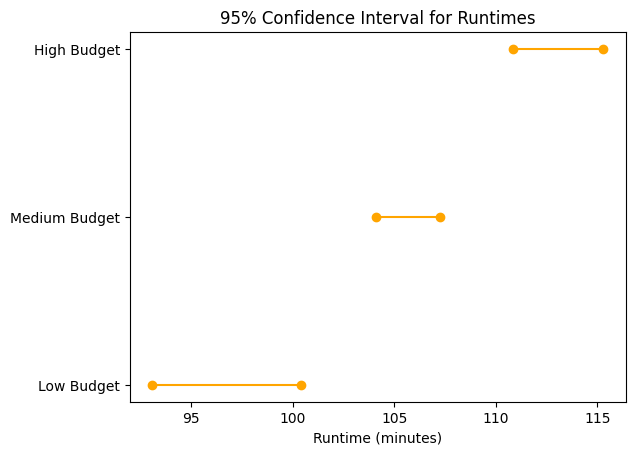

In [79]:
data_dict = {}
data_dict['category'] = ['Low Budget','Medium Budget','High Budget']
data_dict['lower'] = [93.07,104.11,110.84]
data_dict['upper'] = [100.40, 107.24, 115.29]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.yticks(range(len(dataset)),list(dataset['category']))

plt.title('95% Confidence Interval for Runtimes')
plt.xlabel('Runtime (minutes)')

In [80]:
high_budget_genres.groupby('genres').agg(
  avg_wwratio=('WW_success', 'mean'),
  rng=("WW_success", lambda x: (max(x) - min(x))))

,avg_wwratio,rng
genres,,
Action,3.012945,13.583386
Adventure,3.496600,15.416554
Animation,4.186219,15.416554
Biography,4.531782,15.375528
Comedy,3.695595,15.187076
Crime,2.706632,7.712349
Documentary,2.534649,4.473957
Drama,2.910103,15.568850
Family,2.781562,8.231997


In [81]:
mid_budget_genres.groupby('genres').agg(
  median_wwratio=('WW_success', 'median'),
  rng=("WW_success", lambda x: (max(x) - min(x))))

,median_wwratio,rng
genres,,
Action,2.201747,30.994656
Adventure,2.286397,10.018934
Animation,1.553740,7.417551
Biography,2.266116,30.892209
Comedy,2.591766,24.351993
Crime,2.168148,10.232262
Documentary,3.224991,19.659183
Drama,2.349789,31.002378
Family,2.346050,14.813942


In [82]:
low_budget_genres.groupby('genres').agg(
  median_wwratio=('WW_success', 'median'),
  rng=("WW_success", lambda x: (max(x) - min(x))))

,median_wwratio,rng
genres,,
Action,1.202595,8.559793
Adventure,4.669966,12.654561
Biography,15.497405,8.004402
Comedy,3.302006,27.068111
Crime,0.936367,16.400664
Documentary,1.498421,12.896978
Drama,4.774980,38.947131
Family,1.079151,0.000000
Fantasy,6.219535,22.470603


In [83]:
num_low_genres = low_budget_genres['genres'].value_counts()
num_low_genres = num_low_genres.to_frame().reset_index()

low_budget_genres_moneymaking = low_budget_genres[low_budget_genres['WW_success'] > 1]
num_low_budget_genres_moneymaking = low_budget_genres_moneymaking['genres'].value_counts()
num_low_budget_genres_moneymaking = num_low_budget_genres_moneymaking.to_frame().reset_index()
num_low_budget_genres_moneymaking= num_low_budget_genres_moneymaking.rename(columns = {'count':'moneymake_count'})

low_budget_ratio = pd.merge(num_low_genres, num_low_budget_genres_moneymaking, right_on = 'genres', left_on = 'genres', how = 'outer')
low_budget_ratio = low_budget_ratio.fillna(0)

low_budget_ratio['percentage_moneymaking'] = (low_budget_ratio['moneymake_count']/low_budget_ratio['count'])*100
low_budget_ratio

,genres,count,moneymake_count,percentage_moneymaking
0,Drama,46,36.0,78.260870
1,Thriller,26,20.0,76.923077
2,Horror,24,22.0,91.666667
3,Comedy,18,11.0,61.111111
4,Romance,15,13.0,86.666667
5,Mystery,14,13.0,92.857143
6,Crime,9,4.0,44.444444
7,Action,8,4.0,50.000000
8,Sci-Fi,6,5.0,83.333333
9,Documentary,5,3.0,60.000000


In [84]:
num_mid_genres = mid_budget_genres['genres'].value_counts()
num_mid_genres = num_mid_genres.to_frame().reset_index()

mid_budget_genres_moneymaking = mid_budget_genres[mid_budget_genres['WW_success'] > 1]
num_mid_budget_genres_moneymaking = mid_budget_genres_moneymaking['genres'].value_counts()
num_mid_budget_genres_moneymaking = num_mid_budget_genres_moneymaking.to_frame().reset_index()
num_mid_budget_genres_moneymaking= num_mid_budget_genres_moneymaking.rename(columns = {'count':'moneymake_count'})

mid_budget_ratio = pd.merge(num_mid_genres, num_mid_budget_genres_moneymaking, right_on = 'genres', left_on = 'genres', how = 'outer')
mid_budget_ratio = mid_budget_ratio.fillna(0)

mid_budget_ratio['percentage_moneymaking'] = (mid_budget_ratio['moneymake_count']/mid_budget_ratio['count']) * 100
mid_budget_ratio


,genres,count,moneymake_count,percentage_moneymaking
0,Drama,385,298,77.402597
1,Comedy,226,194,85.840708
2,Action,139,106,76.258993
3,Crime,121,87,71.900826
4,Thriller,115,93,80.869565
5,Romance,108,91,84.259259
6,Biography,75,58,77.333333
7,Adventure,67,53,79.104478
8,Horror,67,57,85.074627
9,Mystery,55,46,83.636364


In [85]:
num_high_genres = high_budget_genres['genres'].value_counts()
num_high_genres = num_high_genres.to_frame().reset_index()

high_budget_genres_moneymaking = high_budget_genres[high_budget_genres['WW_success'] > 1]
num_high_budget_genres_moneymaking = high_budget_genres_moneymaking['genres'].value_counts()
num_high_budget_genres_moneymaking = num_high_budget_genres_moneymaking.to_frame().reset_index()
num_high_budget_genres_moneymaking= num_high_budget_genres_moneymaking.rename(columns = {'count':'moneymake_count'})

high_budget_ratio = pd.merge(num_high_genres, num_high_budget_genres_moneymaking, right_on = 'genres', left_on = 'genres', how = 'outer')
high_budget_ratio = high_budget_ratio.fillna(0)

high_budget_ratio['percentage_moneymaking'] = (high_budget_ratio['moneymake_count']/high_budget_ratio['count']) * 100
high_budget_ratio


,genres,count,moneymake_count,percentage_moneymaking
0,Adventure,217,204,94.009217
1,Action,199,179,89.949749
2,Comedy,117,113,96.581197
3,Drama,97,85,87.628866
4,Animation,73,72,98.630137
5,Sci-Fi,59,58,98.305085
6,Thriller,52,48,92.307692
7,Fantasy,51,46,90.196078
8,Crime,32,29,90.625000
9,Family,31,29,93.548387


In [86]:
median_lowbudget_lang = reg_lang_low_budget.groupby('language').agg(
  median_foreignratio=('foreign_success', 'median'),
  rng=("foreign_success", lambda x: (max(x) - min(x)))).sort_values('median_foreignratio', ascending = False)

median_lowbudget_lang = median_lowbudget_lang.reset_index()

median_lowbudget_lang = median_lowbudget_lang[median_lowbudget_lang['language'].isin(low_budget_language)]
median_lowbudget_lang

,language,median_foreignratio,rng
1,Croatian,9.866667,28.361905
5,English,4.371429,31.566000
6,French,4.250000,201.930000
7,Turkish,3.700000,201.930000
8,Bulgarian,3.650000,48.406667
9,Hebrew,3.562500,48.321250


In [87]:
median_midbudget_lang = reg_lang_mid_budget.groupby('language').agg(
  median_foreignratio=('foreign_success', 'median'),
  rng=("foreign_success", lambda x: (max(x) - min(x)))).sort_values('median_foreignratio', ascending = False)

median_midbudget_lang = median_midbudget_lang.reset_index()

median_midbudget_lang = median_midbudget_lang[median_midbudget_lang['language'].isin(mid_budget_language)]
median_midbudget_lang

,language,median_foreignratio,rng
4,Croatian,2.737679,13.535567
7,Cantonese,2.055000,2.775000
8,Mandarin Chinese,2.055000,30.258947
9,Spanish,1.876000,5.638462
10,Persian,1.711170,9.019286
11,Bosnian,1.696825,8.451000
13,Swedish,1.515000,10.648571
14,Catalan,1.427464,9.491176
15,Hebrew,1.374328,26.582458
16,English,1.331429,26.581359


In [88]:
median_highbudget_lang = reg_lang_high_budget.groupby('language').agg(
  mean_foreignratio=('foreign_success', 'mean'),
  rng=("foreign_success", lambda x: (max(x) - min(x)))).sort_values('mean_foreignratio', ascending = False)
median_highbudget_lang = median_highbudget_lang.reset_index()

median_highbudget_lang = median_highbudget_lang[median_highbudget_lang['language'].isin(high_budget_language)]
median_highbudget_lang

,language,mean_foreignratio,rng
2,Serbian,3.856153,11.464069
3,Dutch,2.915079,6.363152
5,Mandarin Chinese,2.800927,4.841333
6,Persian,2.791811,10.269329
7,Catalan,2.638516,10.505027
8,Hindi,2.625933,2.611456
12,Cantonese,2.440625,3.377273
13,English,2.404757,12.494541
16,Hebrew,2.118112,12.494541
17,Croatian,2.064123,3.720712


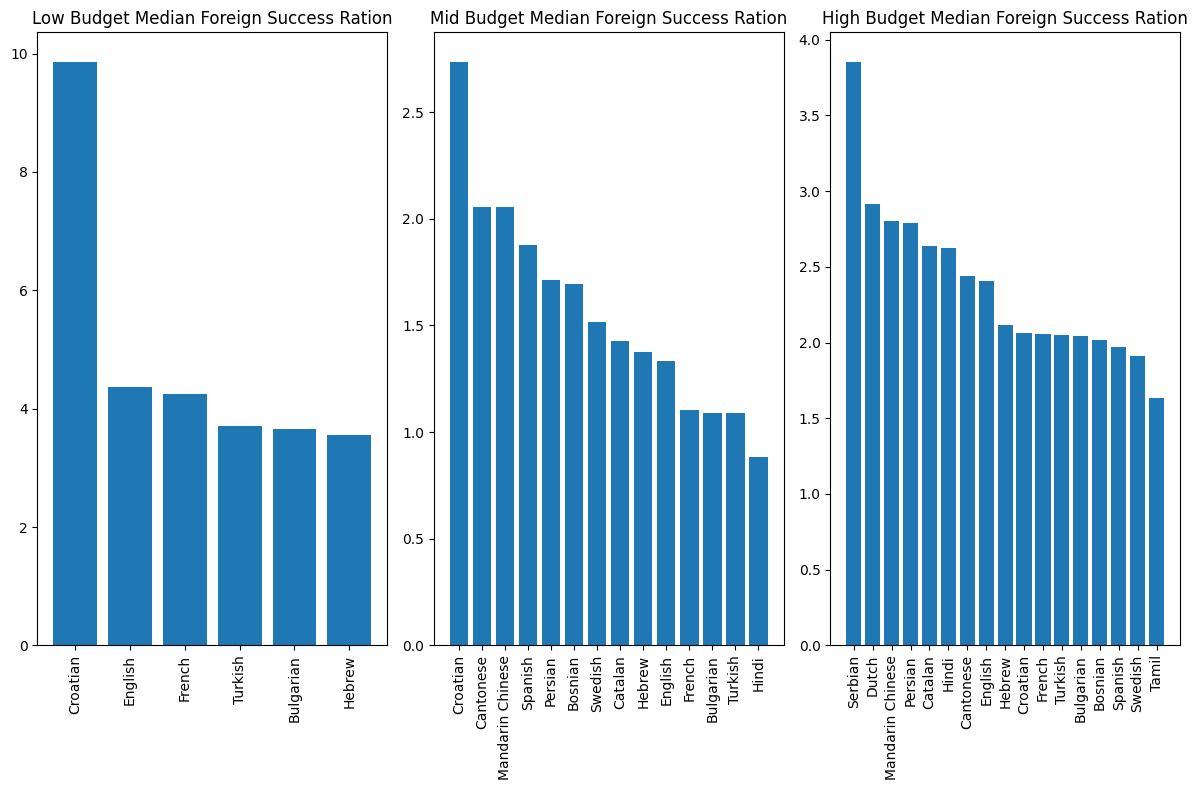

In [89]:
fig, ax = plt.subplots(1,3, figsize = (12,8))

ax[0].bar(median_lowbudget_lang['language'], median_lowbudget_lang['median_foreignratio'])

ax[1].bar(median_midbudget_lang['language'], median_midbudget_lang['median_foreignratio'])

ax[2].bar(median_highbudget_lang['language'], median_highbudget_lang['mean_foreignratio'])

ax[1].tick_params(axis='x', rotation=90)
ax[0].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)

ax[0].set_title('Low Budget Median Foreign Success Ration')

ax[1].set_title('Mid Budget Median Foreign Success Ration')

ax[2].set_title('High Budget Median Foreign Success Ration')

fig.tight_layout()